# Facial Recognization via AWS Rekognition

### Group Member
- Group 10
- Annie Luo, Joy Peng, Diane Guan, Helen Hsu, Chloe Hu, Tiantian Meng, Abbey Yuan

## Introduction

Currently, the Covid-19 pandemic has resulted in considerable changes to our way of life compared to the era before the pandemic. While wearing masks became a norm in daily life for individuals, it inconveniences us to read and understand others’ facial expressions of emotions under the cover of a mask. According to Grenville and Dwyer, without wearing masks, confidence was significantly greater, with the impact evident for all emotions except anger. It demonstrates that emotion recognition is altered by face masks, but that the effectiveness varies depending on the expressed mood.


This project seeks to identify the flaw in the Rekognition algorithm and determine the effect of wearing masks and glasses in determining the facial expression of emotions(positive vs negative) of individuals. Based on previously mentioned research, we hypothesize that while wearing both masks and glasses would yield the lowest confidence statistics, wearing neither of them would yield the highest confidence results. In comparing wearing a mask and weaning glasses, wearing a mask should present a lower confidence statistic.

[Reference](https://cognitiveresearchjournal.springeropen.com/articles/10.1186/s41235-022-00366-w#:~:text=The%20most%20general%20observation%20from,by%20wearing%20a%20face%20mask..)


## Objectives

We hypothesized that wearing glasses and/or masks would impair the effectiveness of AWS Rekognition on recognizing human faces. More specifically, we believe that wearing masks would make it much more difficult for the machine to detect whether one is smiling, and wearing masks and/or glasses would affect Rekognition's ability to predict the emotions of the faces.

So we did a controlled experiment using photos of our group members, where everything is the same within each set of photos except wearing masks and/ or glasses or not.



## Data Collection 
All data used has been uploaded to a public S3 bucket on AWS named "qtm350-final-project." If there are any access issues, we have also uploaded our photo data under "Photos" folder on this github page. 

We took 4 photos of each of our group members. One with glasses, one with mask, one with both glasses and mask, and one with neither.

1. no mask, no glasses 
2. no mask, with glasses 
3. with mask, no glasses 
4. with mask, with glasses

This dataset allowed us to do a controlled experiment on performance of Rekognition algorithm with and without factors of wearing masks and wearing glasses. Since we have 7 group members, we took a total of 7 x 4 = 28 pictures. So our dataset have 28 observations for our input data. 
Our output data would be two tables demonstrating attributes of Rekognition that we selected to analyze. Please see conclusion for further explanation of our output data.

Note: we have included our code that created an S3 bucket and moved photos to this bucket.

## Analysis

### Attributes of each photo

In [108]:
# Initialize Dependencies
import boto3
import json
import numpy as np
import pandas as pd
#packages for plots
import matplotlib.pyplot as plt
import s3fs
fs = s3fs.S3FileSystem()
from PIL import Image

In [ ]:
#created a bucket
!aws s3 mb s3://qtm350-final-project

In [ ]:
#check current S3 buckets to see if the above bucket has been successfully created
!aws s3 ls

In [ ]:
#move photos to our newly created bucket
!aws s3 mv Photos//guan1.JPG s3://qtm350-final-project
!aws s3 mv Photos//guan2.JPG s3://qtm350-final-project
!aws s3 mv Photos//guan3.JPG s3://qtm350-final-project
!aws s3 mv Photos//guan4.JPG s3://qtm350-final-project
!aws s3 mv Photos//luo1.jpeg s3://qtm350-final-project
!aws s3 mv Photos//luo2.jpeg s3://qtm350-final-project
!aws s3 mv Photos//luo3.jpeg s3://qtm350-final-project
!aws s3 mv Photos//luo4.jpeg s3://qtm350-final-project
!aws s3 mv Photos//meng1.jpg s3://qtm350-final-project
!aws s3 mv Photos//meng2.jpg s3://qtm350-final-project
!aws s3 mv Photos//meng3.jpg s3://qtm350-final-project
!aws s3 mv Photos//meng4.jpg s3://qtm350-final-project
!aws s3 mv Photos//peng1.jpeg s3://qtm350-final-project
!aws s3 mv Photos//peng2.jpeg s3://qtm350-final-project
!aws s3 mv Photos//peng3.jpeg s3://qtm350-final-project
!aws s3 mv Photos//peng4.jpeg s3://qtm350-final-project
!aws s3 mv Photos//yuan1.JPG s3://qtm350-final-project
!aws s3 mv Photos//yuan2.JPG s3://qtm350-final-project
!aws s3 mv Photos//yuan3.JPG s3://qtm350-final-project
!aws s3 mv Photos//yuan4.JPG s3://qtm350-final-project
!aws s3 mv Photos//hsu1.jpeg s3://qtm350-final-project
!aws s3 mv Photos//hsu2.jpeg s3://qtm350-final-project
!aws s3 mv Photos//hsu3.jpeg s3://qtm350-final-project
!aws s3 mv Photos//hsu4.jpeg s3://qtm350-final-project

In [109]:
# Initialize clients
client = boto3.client('rekognition')
#Make a datafram by first creating a list of the photos
s3_resource = boto3.resource('s3')
my_bucket = s3_resource.Bucket('qtm350-final-project')
summaries = my_bucket.objects.all()
image_names = [image.key for image  in summaries]

In [110]:
#Reviewing what data we have in our s3 bucket
!aws s3 ls qtm350-final-project

2022-11-22 21:07:01    3389327 guan1.JPG
2022-11-22 21:11:10    3748740 guan2.JPG
2022-11-22 21:11:11    4531495 guan3.JPG
2022-11-22 21:11:11    4411550 guan4.JPG
2022-11-22 21:54:57    2099947 hsu1.jpeg
2022-11-22 21:54:58    2082578 hsu2.jpeg
2022-11-22 21:54:58    2094801 hsu3.jpeg
2022-11-22 21:54:59    2142550 hsu4.jpeg
2022-11-22 21:11:12     193429 luo1.jpeg
2022-11-22 21:11:13     198693 luo2.jpeg
2022-11-22 21:11:14     213083 luo3.jpeg
2022-11-22 21:11:15     189164 luo4.jpeg
2022-11-22 21:11:15     508724 meng1.jpg
2022-11-22 21:11:16     479926 meng2.jpg
2022-11-22 21:11:17     465316 meng3.jpg
2022-11-22 21:11:17     464254 meng4.jpg
2022-11-22 21:11:18    1843220 peng1.jpeg
2022-11-22 21:11:19    1770896 peng2.jpeg
2022-11-22 21:11:20    2031102 peng3.jpeg
2022-11-22 21:11:20    1947570 peng4.jpeg
2022-11-22 21:11:21     370230 yuan1.JPG
2022-11-22 21:11:22     435862 yuan2.JPG
2022-11-22 21:11:23     470192 yuan3.JPG
2022-11-22 21:11:23     422453 yuan4.JPG


Define a python function that return the smile value of a given photo, that is, whether Rekognition thinks the face in the photo is smiling. 

In [111]:
def smile_analysis(photo):

    response = client.detect_faces(Image={'S3Object':{'Bucket':'qtm350-final-project','Name':photo}},Attributes=['ALL'])
 
    for faceDetail in response['FaceDetails']:
        return faceDetail['Smile']['Value']

Define a python function that return the Eyeglasses value of a given photo, that is, whether Rekognition thinks the face in the photo is wearing glasses.

In [112]:
def eyeglasses_analysis(photo):
    
    response = client.detect_faces(Image={'S3Object':{'Bucket':'qtm350-final-project','Name':photo}},Attributes=['ALL'])
        
    for faceDetail in response['FaceDetails']:
        return faceDetail['Eyeglasses']['Value']

Define a python function that return the Emotions type of a given photo, that is, what emotion Rekognition thinks the face in the photo is showing.

In [113]:
def emotion_analysis(photo):
    
    response = client.detect_faces(Image={'S3Object':{'Bucket':'qtm350-final-project','Name':photo}},Attributes=['ALL'])
        
    for faceDetail in response['FaceDetails']:
        return faceDetail['Emotions'][0]['Type']

Create a dataframe called df_facial_analysis that demonstrate the Smile value, Eyeglasses value, and Emotions type of each photo.  

In [8]:
df_facial_analysis = pd.DataFrame({'Name':image_names})
df_facial_analysis['Smile'] = [smile_analysis(photo) for photo in df_facial_analysis['Name']]
df_facial_analysis['Glasses'] = [eyeglasses_analysis(photo) for photo in df_facial_analysis['Name']]
df_facial_analysis['Emotion'] = [emotion_analysis(photo) for photo in df_facial_analysis['Name']]
df_facial_analysis

Name  Smile  Glasses   Emotion
0    guan1.JPG  False    False      CALM
1    guan2.JPG  False     True      CALM
2    guan3.JPG  False     True      FEAR
3    guan4.JPG  False     True      FEAR
4    hsu1.jpeg  False    False      CALM
5    hsu2.jpeg  False     True      CALM
6    hsu3.jpeg  False     True      FEAR
7    hsu4.jpeg  False     True       SAD
8    luo1.jpeg  False    False      CALM
9    luo2.jpeg  False     True      CALM
10   luo3.jpeg  False     True      FEAR
11   luo4.jpeg  False     True      FEAR
12   meng1.jpg  False    False      CALM
13   meng2.jpg  False     True      CALM
14   meng3.jpg  False    False      CALM
15   meng4.jpg  False     True       SAD
16  peng1.jpeg   True    False     HAPPY
17  peng2.jpeg  False     True  CONFUSED
18  peng3.jpeg  False    False      FEAR
19  peng4.jpeg  False     True      FEAR
20   yuan1.JPG  False    False      CALM
21   yuan2.JPG  False     True      CALM
22   yuan3.JPG  False     True      FEAR
23   yuan4.JPG  False     True      FEAR

### Visualization of first table
We can see that there are a few mistaken classifications. We will be displaying some example photos below to demonstrate how Rekognition misclassified.
1) "guan3.JPG" is not wearing glasses
2) "hsu3.jpeg" does not seem "FEAR"
3) "luo3.jpeg" is not wearing glasses
4) "meng4.jpg" does not seem "SAD"
5) "peng2.jpeg" is clearly similing
6) "yuan3.JPG" is not wearing glasses

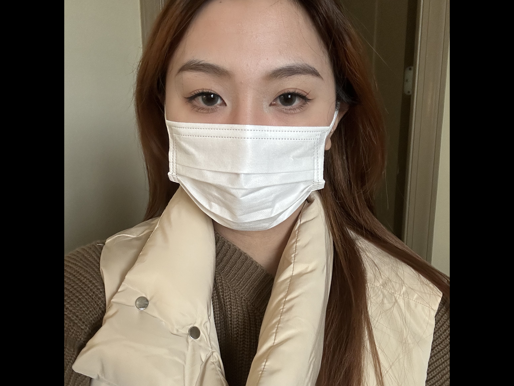

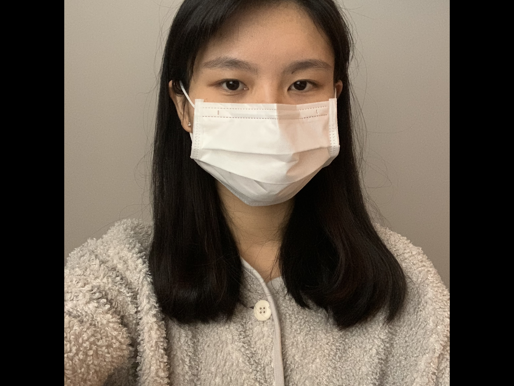

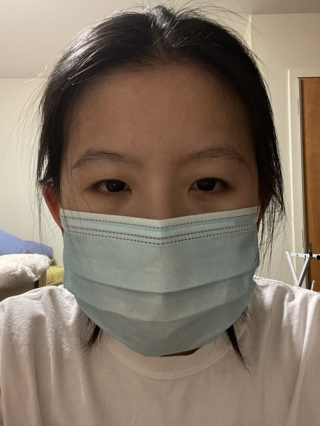

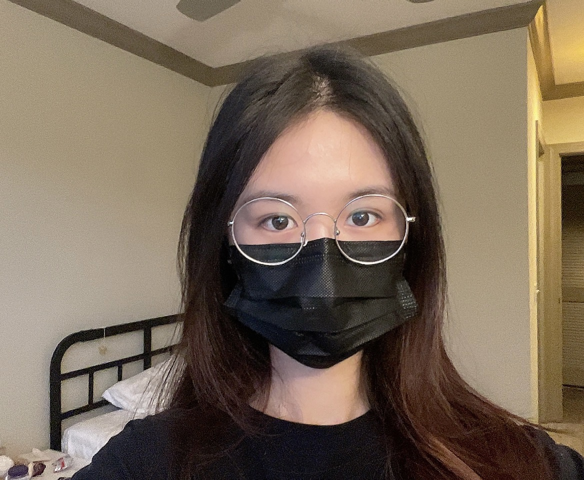

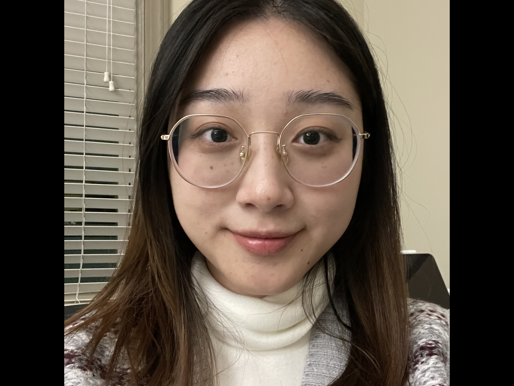

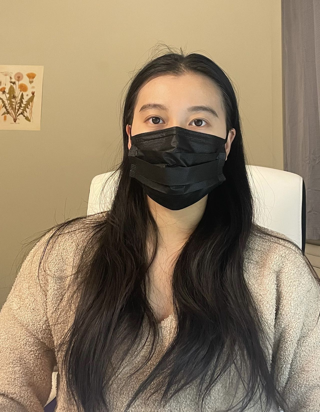

In [84]:
#display image of guan3.JPG
file = fs.open('s3://qtm350-final-project/guan3.JPG')
image = Image.open(file)
rot_image= image.rotate(-90)
(width, height) = (rot_image.width // 6, rot_image.height // 6)
im_resized = rot_image.resize((width, height))
display(im_resized)
#display image of hsu3.jpeg
file = fs.open('s3://qtm350-final-project/hsu3.jpeg')
image = Image.open(file)
rot_image= image.rotate(-90)
(width, height) = (rot_image.width // 6, rot_image.height // 6)
im_resized = rot_image.resize((width, height))
display(im_resized)
#display image of luo3.jpeg
file = fs.open('s3://qtm350-final-project/luo3.jpeg')
image = Image.open(file)
(width, height) = (image.width // 4, image.height // 4)
im_resized = image.resize((width, height))
display(im_resized)
#display image of meng4.jpg
file = fs.open('s3://qtm350-final-project/meng4.jpg')
image = Image.open(file)
(width, height) = (image.width // 2, image.height // 2)
im_resized = image.resize((width, height))
display(im_resized)
#display image of peng2.jpeg
file = fs.open('s3://qtm350-final-project/peng2.jpeg')
image = Image.open(file)
rot_image= image.rotate(-90)
(width, height) = (rot_image.width // 6, rot_image.height // 6)
im_resized = rot_image.resize((width, height))
display(im_resized)
#display image of yuan3.JPG
file = fs.open('s3://qtm350-final-project/yuan3.JPG')
image = Image.open(file)
(width, height) = (image.width // 4, image.height // 4)
im_resized = image.resize((width, height))
display(im_resized)

### Compare faces and determine similarity

Define a python function that return the Similarity value of a given photo, that is, whether Rekognition thinks the face in the photo is smiling.

In [9]:
 def extract_similarity(sourcephoto, targetphoto):
    try:
        comparison = client.compare_faces(
            SourceImage= {'S3Object':{'Bucket':'qtm350-final-project', 'Name':sourcephoto}},
            TargetImage = {'S3Object':{'Bucket':'qtm350-final-project','Name':targetphoto}})
        similarity = comparison['FaceMatches'][0]['Similarity']
    except Exception:
        similarity = np.nan
    return similarity

Create a dataframe called df_similarity that demonstrate the similarities between 

In [100]:
df_similarity = pd.DataFrame({'Name':image_names})
df_similarity['SimilarityGuan'] = [extract_similarity('guan1.JPG', photo) for photo in df_similarity['Name']]
df_similarity['SimilarityHsu'] = [extract_similarity('hsu1.jpeg', photo) for photo in df_similarity['Name']]
df_similarity['SimilarityLuo'] = [extract_similarity('luo1.jpeg', photo) for photo in df_similarity['Name']]
df_similarity['SimilarityMeng'] = [extract_similarity('meng1.jpg', photo) for photo in df_similarity['Name']]
df_similarity['SimilarityPeng'] = [extract_similarity('peng1.jpeg', photo) for photo in df_similarity['Name']]
df_similarity['SimilarityYuan'] = [extract_similarity('yuan1.JPG', photo) for photo in df_similarity['Name']]
df_similarity

Name  SimilarityGuan  SimilarityHsu  SimilarityLuo  SimilarityMeng  \
0    guan1.JPG      100.000000            NaN            NaN             NaN   
1    guan2.JPG       99.999062            NaN            NaN             NaN   
2    guan3.JPG       99.693840            NaN            NaN             NaN   
3    guan4.JPG       92.780724            NaN            NaN             NaN   
4    hsu1.jpeg             NaN     100.000000            NaN             NaN   
5    hsu2.jpeg             NaN      99.999649            NaN             NaN   
6    hsu3.jpeg             NaN      99.970329            NaN             NaN   
7    hsu4.jpeg             NaN      99.691322            NaN             NaN   
8    luo1.jpeg             NaN            NaN     100.000000             NaN   
9    luo2.jpeg             NaN            NaN      99.999672             NaN   
10   luo3.jpeg             NaN            NaN      99.741180             NaN   
11   luo4.jpeg             NaN            NaN      99.481415             NaN   
12   meng1.jpg             NaN            NaN            NaN      100.000000   
13   meng2.jpg             NaN            NaN            NaN       99.999825   
14   meng3.jpg             NaN            NaN            NaN       99.960548   
15   meng4.jpg             NaN            NaN            NaN       99.802261   
16  peng1.jpeg             NaN            NaN            NaN             NaN   
17  peng2.jpeg             NaN            NaN            NaN             NaN   
18  peng3.jpeg             NaN            NaN            NaN             NaN   
19  peng4.jpeg             NaN            NaN            NaN             NaN   
20   yuan1.JPG             NaN            NaN            NaN             NaN   
21   yuan2.JPG             NaN            NaN            NaN             NaN   
22   yuan3.JPG             NaN            NaN            NaN             NaN   
23   yuan4.JPG             NaN            NaN            NaN             NaN   

    SimilarityPeng  SimilarityYuan  
0              NaN             NaN  
1              NaN             NaN  
2              NaN             NaN  
3              NaN             NaN  
4              NaN             NaN  
5              NaN             NaN  
6              NaN             NaN  
7              NaN             NaN  
8              NaN             NaN  
9              NaN             NaN  
10             NaN             NaN  
11             NaN             NaN  
12             NaN             NaN  
13             NaN             NaN  
14             NaN             NaN  
15             NaN             NaN  
16      100.000000             NaN  
17       99.999855             NaN  
18       99.873413             NaN  
19       98.814133             NaN  
20             NaN      100.000000  
21             NaN       99.999908  
22             NaN       99.967865  
23             NaN       99.810638

### Visualization of second table

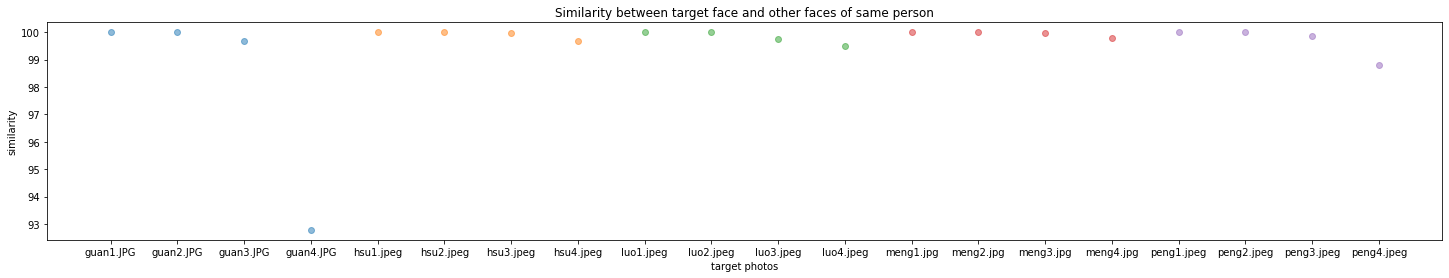

In [103]:
#name is y var, sim is x var, denoting all similarity scores generated above
name = df_similarity['Name']
sim = df_similarity.iloc[:, 1:6]
#plot x and y vars using a scatter plot
#add visualization settings
plt.figure(figsize=(25,4))
# Add x, y, lable and title
plt.xlabel('target photos')
plt.ylabel('similarity')
plt.title('Similarity between target face and other faces of same person')
#plot
display(plt.plot(name, sim, 'o', alpha=0.5))

We can see from the plot above that, within each set of photos (as marked by same colors), the similarity scores among those photos are very high, meaning that Rekognition correctly recognized faces of the same person as very similar. From the above plot, we can safely conclude that wearing masks and/or glasses does not impair Rekognition's ability to compare faces too much.

Since there are only 4 photos in each set, it does not make too much sense to run a linear regression due to the small amount of data we have. In addition, for each set, there's essentially only one observation per variable--with glasses, with mask, with both, and with neither, so we can't really run a linear regression to find correlation between explanatory variables.
In the future, it would be interesting if we add more observations to each category and run a linear regression between, say, the same individual wearing glasses vs similarity score.

## Conclusion
In the "Smile" attribute, we found that wearing glasses and/ or mask impaired Rekognition's ability to detect smiles. In peng's example, where Peng smiled in all four photos, Rekognition only detected the smile in the photo with neither glasses nor mask. In the "Glasses" attribute, we found that Rekognition is tempted to recognize faces with only masks on as having glasses on, since a lot of photos ended with a 3: with mask, no glasses were classified as "True" for "Glasses" feature. In the "Emotion" attribute, we can also see the effects of wearing masks on Rekognition, since many photos numbered 3 and 4: with mask, no glasses and with mask, with glasses, respectively, were mistakenly detected as "FEAR." Finally, we found that the similarity attribute of Rekognition is pretty strong, since we saw minimal influences of wearing glasses and/or masks on similarity among faces of the same person. In general, we can see the trend that certain features of Rekognition has been affected by the person in the photo wearing glasses and/ or masks, while some features were not very much affected.